In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('7_logistic_reg/insurance_data.csv')

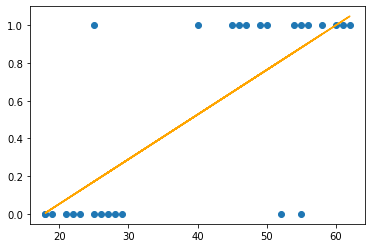

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(df[['age']], df['bought_insurance'])
plt.scatter(df['age'], df['bought_insurance'])
plt.plot(df['age'], reg.predict(df[['age']]), color = 'orange')

In [4]:
# From the video playlist tutorial

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df['bought_insurance'], test_size = 0.1)

In [5]:
from sklearn.linear_model import LogisticRegression
logis_reg = LogisticRegression().fit(X_train, y_train)
print(logis_reg.predict(X_test))
y_test

[0 1 0]


0     0
14    1
21    0
Name: bought_insurance, dtype: int64

## Exercise

In [8]:
df = pd.read_csv('7_logistic_reg/Exercise/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

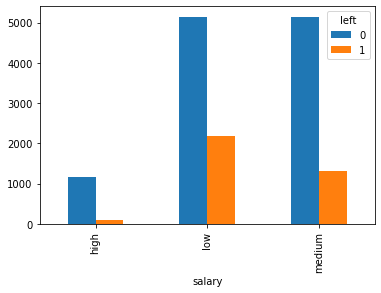

In [15]:
pd.crosstab(df.salary, df.left).plot(kind = 'bar')

In [18]:
sub_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [23]:
salary_dummies = pd.get_dummies(sub_df.salary, prefix = 'salary')
df_with_dummies = pd.concat([sub_df, salary_dummies], axis = 'columns')
df_with_dummies.drop('salary', axis = 'columns', inplace = True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [24]:
X = df_with_dummies.copy()
y = df.left

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [29]:
from sklearn.linear_model import LogisticRegression
reg_model = LogisticRegression().fit(X_train, y_train)

In [30]:
reg_model.predict(X_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
reg_model.score(X_test, y_test)

0.7664444444444445

In [36]:
x = [1, 2, 3, 4, 5, 6]
y = x[0:-1]
y

[1, 2, 3, 4, 5]